<a href="https://colab.research.google.com/github/nepomucenoc/time-series/blob/main/Seriestemporais_conceitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series temporais

In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Series_temporais/Materiais+de+Apoio - arquivo 03/Materiais de Apoio/champagne_sales.csv')
series

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
...,...,...
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413


In [ ]:
type(series)

pandas.core.frame.DataFrame



*   **header=0** : A informação de colunas está na primeira linha do arquivo
*   **parse_date=True** : Sinalizamos que o dataset contém coluna do tipo date.
*   **index_col=0** : Definimos nossa coluna indice que é a informação temporal.
*   **squeeze=True**: Sinalizamos que nos temos apenas um dado de coluna e que queremos transformar isso em uma série e não em um dataframe.

In [ ]:
from pandas import read_csv
series = read_csv('/content/drive/MyDrive/Colab Notebooks/Series_temporais/Materiais+de+Apoio - arquivo 03/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
series

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, Length: 105, dtype: int64

## Explorando e visualizando os dados

In [ ]:
series.describe()

count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
Name: Sales, dtype: float64

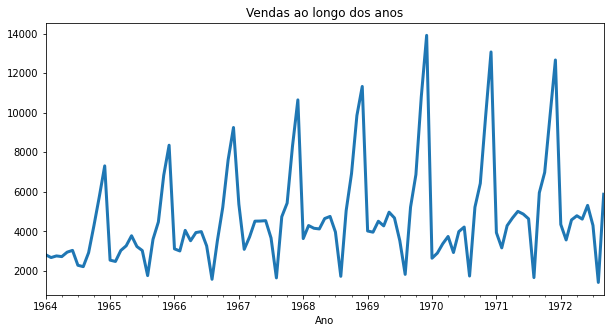

In [ ]:
import matplotlib.pyplot as plt
series.plot(figsize=(10,5),
            linewidth=3,
            fontsize=10,
            title='Vendas ao longo dos anos')
plt.xlabel('Ano', fontsize=10);

In [ ]:
series['1964']

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
1964-06-01    3036
1964-07-01    2282
1964-08-01    2212
1964-09-01    2922
1964-10-01    4301
1964-11-01    5764
1964-12-01    7312
Name: Sales, dtype: int64

In [ ]:
series.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [ ]:
series.values

array([ 2815,  2672,  2755,  2721,  2946,  3036,  2282,  2212,  2922,
        4301,  5764,  7312,  2541,  2475,  3031,  3266,  3776,  3230,
        3028,  1759,  3595,  4474,  6838,  8357,  3113,  3006,  4047,
        3523,  3937,  3986,  3260,  1573,  3528,  5211,  7614,  9254,
        5375,  3088,  3718,  4514,  4520,  4539,  3663,  1643,  4739,
        5428,  8314, 10651,  3633,  4292,  4154,  4121,  4647,  4753,
        3965,  1723,  5048,  6922,  9858, 11331,  4016,  3957,  4510,
        4276,  4968,  4677,  3523,  1821,  5222,  6872, 10803, 13916,
        2639,  2899,  3370,  3740,  2927,  3986,  4217,  1738,  5221,
        6424,  9842, 13076,  3934,  3162,  4286,  4676,  5010,  4874,
        4633,  1659,  5951,  6981,  9851, 12670,  4348,  3564,  4577,
        4788,  4618,  5312,  4298,  1413,  5877])

Vendas por mês de cada ano

In [ ]:
from pandas import Grouper
from matplotlib import pyplot
from pandas import DataFrame

In [ ]:
# Removendo os dados do ano 1972 por este ano ter menos dados
series.drop(series['1972'].index, inplace=True)

In [ ]:
grupos = series.groupby(Grouper(freq='A'))
anos = DataFrame()
for nome, grupo in grupos:
  anos[nome.year] = grupo.values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7febee9be710>,
      dtype=object)

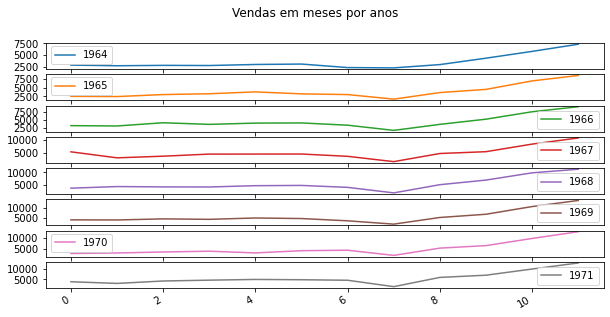

In [ ]:
anos.plot(figsize=(10,5)
          ,subplots=True
          ,title='Vendas em meses por anos')

Vendas por ano - Gráfico de pontos

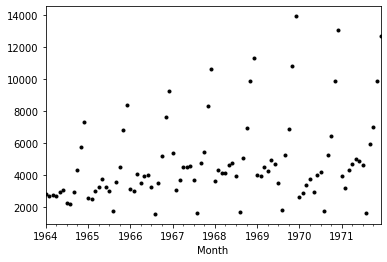

In [ ]:
from pandas.io.formats import style
series.plot(style = 'k.')

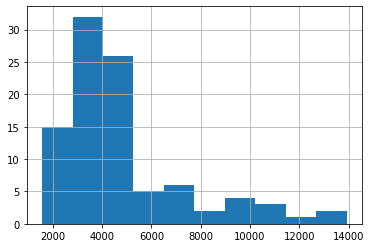

In [ ]:
series.hist()

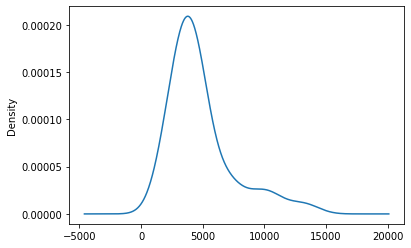

In [ ]:
series.plot(kind='kde')

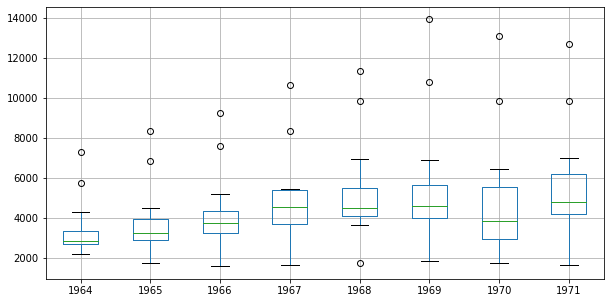

In [ ]:
grupos = series.groupby(Grouper(freq='A'))
anos = DataFrame()
for nome, grupo in grupos:
  anos[nome.year] = grupo.values
anos.boxplot(figsize=(10,5))

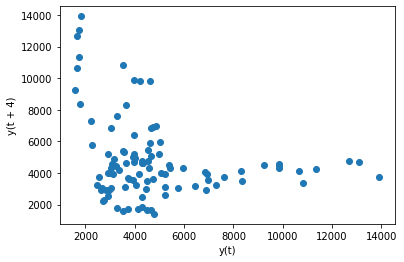

In [ ]:
#Dispersão de valores e lags
# Visualizando a dispersão entre o valor t e t+n

from pandas.plotting import lag_plot
lag_plot(series, lag=4)

**Autocorrelação**



1.   Mede a autocorrelação entre os lags.
2.   Ao execer as linhas pontilhadas mostra relevância estatística.

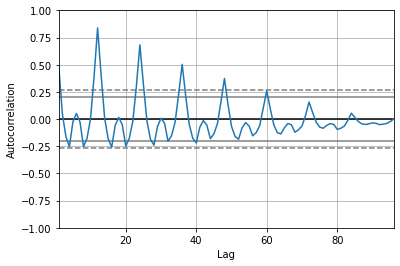

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)

**Autocorrelação com Statsmodels**

*   Calcula a correlação com lags.
*   Pode ser utilizado para configurações de modelos de previsão.
*   Exibe o intervalo de confiança de 95% por padrão.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


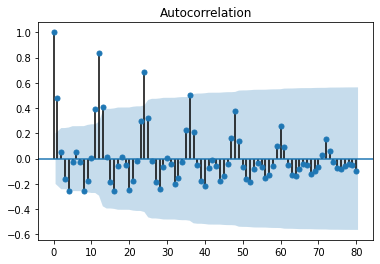

In [ ]:
plot_acf(series, lags=80)
pyplot.show()

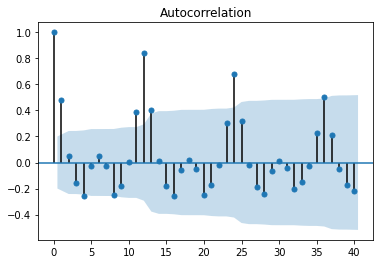

In [ ]:
plot_acf(series, lags=40)
pyplot.show()

## **Modelagem dos dados**

Remodelar os dados envolve alterar a frequência das observacoes em dois tipos:

 **Upsampling**: Significa aumentar a frequencia das amostras, como por exemplo, minutos para segundos.

 **Downsampling**: Significa diminuir a frequencia das amostras, como por exemplo, dias para meses.

Existem duas principais razoes porque queremos remodelar nossos dados:

 **Problem Framing**: Remodelar os dados para trabalhar na mesma frequencia que as predicoes que iremos entregar.

 **Feature Engineering**: Remodelar os dados podem entregar insights e informações importantes para modelos de machine learning.

In [ ]:
resample = series.resample('2M')  # a cada dois meses

In [ ]:
type(resample)

pandas.core.resample.DatetimeIndexResampler

In [ ]:
print(resample)

DatetimeIndexResampler [freq=<2 * MonthEnds>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [ ]:
# Cria uma variável para receber os dados do tipo série.

vendas_medias_dois_meses = resample.mean()

In [ ]:
print(vendas_medias_dois_meses.head(15))

Month
1964-01-31    2815.0
1964-03-31    2713.5
1964-05-31    2833.5
1964-07-31    2659.0
1964-09-30    2567.0
1964-11-30    5032.5
1965-01-31    4926.5
1965-03-31    2753.0
1965-05-31    3521.0
1965-07-31    3129.0
1965-09-30    2677.0
1965-11-30    5656.0
1966-01-31    5735.0
1966-03-31    3526.5
1966-05-31    3730.0
Freq: 2M, Name: Sales, dtype: float64


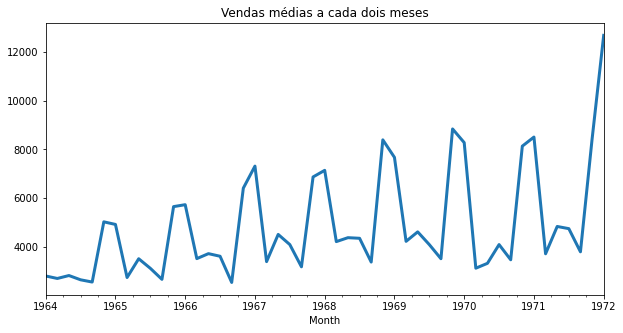

In [ ]:
vendas_medias_dois_meses.plot(figsize=(10,5), linewidth=3, fontsize=10, title='Vendas médias a cada dois meses')
pyplot.show()

**Gráficos com Plotly**
-  Gráficos interativos
-  Visual mais profissional
-  Possibilidade de criaçao de um dasboard na nuvem

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_medias_dois_meses.index,
                   y=vendas_medias_dois_meses.values)]

# Criando Layout:
configuracoes_layout = go.Layout(title='Vendas médias a cada dois meses',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

In [ ]:
# Trabalhando com Trimestres

upsampled = series.resample('Q')

In [ ]:
vendas_trimestre = upsampled.mean()

In [ ]:
print (vendas_trimestre)

Month
1964-03-31     2747.333333
1964-06-30     2901.000000
1964-09-30     2472.000000
1964-12-31     5792.333333
1965-03-31     2682.333333
1965-06-30     3424.000000
1965-09-30     2794.000000
1965-12-31     6556.333333
1966-03-31     3388.666667
1966-06-30     3815.333333
1966-09-30     2787.000000
1966-12-31     7359.666667
1967-03-31     4060.333333
1967-06-30     4524.333333
1967-09-30     3348.333333
1967-12-31     8131.000000
1968-03-31     4026.333333
1968-06-30     4507.000000
1968-09-30     3578.666667
1968-12-31     9370.333333
1969-03-31     4161.000000
1969-06-30     4640.333333
1969-09-30     3522.000000
1969-12-31    10530.333333
1970-03-31     2969.333333
1970-06-30     3551.000000
1970-09-30     3725.333333
1970-12-31     9780.666667
1971-03-31     3794.000000
1971-06-30     4853.333333
1971-09-30     4081.000000
1971-12-31     9834.000000
Freq: Q-DEC, Name: Sales, dtype: float64


In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_trimestre.index,
                   y=vendas_trimestre.values)]

# Criando Layout:
configuracoes_layout = go.Layout(title='Vendas médias por trimestre',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

In [ ]:
# Redimensionando por ano

resample = series.resample('A')

In [ ]:
vendas_por_ano = resample.sum()
print(vendas_por_ano.head())

Month
1964-12-31    41738
1965-12-31    46370
1966-12-31    52052
1967-12-31    60192
1968-12-31    64447
Freq: A-DEC, Name: Sales, dtype: int64


In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_por_ano.index,
                   y=vendas_por_ano.values,
                   marker = {'color':'green'})
                   ]

# Criando Layout:
configuracoes_layout = go.Layout(title='Vendas por Ano',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

In [ ]:
# Calculando a média de vendas por ano

resample = series.resample('A')

# alteramos o método sum() para mean()
vendas_medias_por_ano = resample.mean()
print(vendas_medias_por_ano.head())

Month
1964-12-31    3478.166667
1965-12-31    3864.166667
1966-12-31    4337.666667
1967-12-31    5016.000000
1968-12-31    5370.583333
Freq: A-DEC, Name: Sales, dtype: float64


In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_medias_por_ano.index,
                   y=vendas_medias_por_ano.values,
                   marker = {'color':'green'})
                   ]

# Criando Layout:
configuracoes_layout = go.Layout(title='Média de Vendas por Ano',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

## Engenharia de Features para Séries temporais


*   Objetivo da Engenharia de Features:
    - Fornecer uma **forte e simples** relação entre as variáveis de entrada e a variável alvo para o algoritmo de Machine Learning
    - Para Séries temporais não existe uma relação entre **variáveis de entrada e saída**, nós devemos inventar esses para modelar isso como um problema de aprendizado supervisionado a partir do zero.
    - Podemos nos basear na capacidade de modelos sofisticados para decifrar a complexidade do problema. Ou melhor, podemos facilitar o trabalho para esses modelos (e até usar modelos mais simples) se pudermos expor melhor o relacionamento inerente entre entradas e saídas nos dados.

*  É muito usado em séries temporais features que refletem:

  - *Sazonalidade.*
  - *Janelas de tempo (lag).*
  - *Janelas de tempo com estatísticas.*

*   Foco no negócio. Exemplos:
    - *Trimestre, dia da semana, dia do mês, feriados, final de semana*
    - *vendas dos dias ou periodos anteriores ou a diferença desses valores*





In [ ]:
# datetime tipo de dado
type(series.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
# retorna a hora do datetime
series.index.hour

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='Month', length=105)

In [ ]:
# retorna o trimestre
series.index.quarter

Int64Index([1, 1, 1, 2, 2, 2, 3, 3, 3, 4,
            ...
            4, 1, 1, 1, 2, 2, 2, 3, 3, 3],
           dtype='int64', name='Month', length=105)

In [ ]:
# retorna o dia do ano
series.index.dayofyear

Int64Index([  1,  32,  61,  92, 122, 153, 183, 214, 245, 275,
            ...
            335,   1,  32,  61,  92, 122, 153, 183, 214, 245],
           dtype='int64', name='Month', length=105)

###Manipulando datas

In [ ]:
faixa = pd.date_range(start='2019-01-01', end='2019-12-31', freq='B')

In [ ]:
faixa

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

In [ ]:
pip install holidays

In [ ]:
import holidays
from datetime import date

In [ ]:
feriados = holidays.Brazil()

In [ ]:
# Natal
date(2019, 12, 25) in feriados

True

In [ ]:
# Páscoa
date(2019, 4, 12) in feriados

False

In [ ]:
dias_uteis = []
for dia in faixa.values:
  dia = pd.to_datetime(dia).date()
  print (dia in feriados)
  if dia in feriados:
    continue
  else:
    dias_uteis.append(dia)

True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [ ]:
len(dias_uteis)

253

In [ ]:
dias_uteis = pd.to_datetime(dias_uteis)

In [ ]:
dias_uteis

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=253, freq=None)

In [ ]:
'2019-01-01' in dias_uteis

False

##### **Features de data**
- Dois recursos com os quais podemos começar são o mês e o dia de vendas.
- Podemos imaginar que algoritmos de aprendizado supervisionado podem usar essas entradas para ajudar a obter informações de sazonalidade, como por exemplo: *mês com mais vendas, ou dia do mês que mais vende*.

In [ ]:
from pandas import DataFrame
dataframe = DataFrame()

In [ ]:
dataframe['mes'] = [series.index[i].month for i in range(len(series))]

In [ ]:
dataframe['dia'] = [series.index[i].day for i in range(len(series))]

In [ ]:
dataframe['vendas'] = [series[i] for i in range(len(series))]

### Lag Features

- Slide Window (Janelas deslizantes)

In [ ]:
series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

In [ ]:
# desloca o valor um lag a frente
series.shift()

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [ ]:
# desloca o valor um lag a frente
series.shift(1)  #desloca pro indice seguinte

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [ ]:
# Cria um dataframe chamado temp
temp = DataFrame(series.values)

In [ ]:
temp

,0
0,2815
1,2672
2,2755
3,2721
4,2946
...,...
100,4618
101,5312
102,4298
103,1413


In [ ]:
# Desloca o valor um lag a frente
temp.shift(1)

,0
0,NaN
1,2815.0
2,2672.0
3,2755.0
4,2721.0
...,...
100,4788.0
101,4618.0
102,5312.0
103,4298.0


In [ ]:
# concatenando as colunas

from pandas import concat
dataframe = concat([temp.shift(1), temp], axis=1)

In [ ]:
# cria as coluanas t e t+1
dataframe.columns = ['t', 't+1']

In [ ]:
dataframe.head(5)

,t,t+1
0,NaN,2815
1,2815.0,2672
2,2672.0,2755
3,2755.0,2721
4,2721.0,2946


In [ ]:
# expandindo as lags

temp = DataFrame(series.values)

In [ ]:
# expandindo 2 lags a frente
temp.shift(2)

,0
0,NaN
1,NaN
2,2815.0
3,2672.0
4,2755.0
...,...
100,4577.0
101,4788.0
102,4618.0
103,5312.0


In [ ]:
# expandindo 3 lags a frente
temp.shift(3)

,0
0,NaN
1,NaN
2,NaN
3,2815.0
4,2672.0
...,...
100,3564.0
101,4577.0
102,4788.0
103,4618.0


In [ ]:
# concatena lags
dataframe = concat([temp.shift(3), temp.shift(2), temp.shift(1), temp], axis=1)

In [ ]:
# cria colunas
dataframe.columns = ['t-2', 't-1', 't', 't+1']

In [ ]:
# imprime o dataframe gerado
print(dataframe.head(10))

      t-2     t-1       t   t+1
0     NaN     NaN     NaN  2815
1     NaN     NaN  2815.0  2672
2     NaN  2815.0  2672.0  2755
3  2815.0  2672.0  2755.0  2721
4  2672.0  2755.0  2721.0  2946
5  2755.0  2721.0  2946.0  3036
6  2721.0  2946.0  3036.0  2282
7  2946.0  3036.0  2282.0  2212
8  3036.0  2282.0  2212.0  2922
9  2282.0  2212.0  2922.0  4301


In [ ]:
# dados originais..
temp.head(10)

,0
0,2815
1,2672
2,2755
3,2721
4,2946
5,3036
6,2282
7,2212
8,2922
9,4301


### Trabalhando com o método Rolling

In [ ]:
# cria um dataframe a partir dos dados originais
temp = pd.DataFrame(series.values)

In [ ]:
# a variável dados_deslocados recebe os dados de um lag a frente
dados_deslocados = temp.shift(1)

In [ ]:
# imprime a variável dados_deslocados
dados_deslocados

,0
0,NaN
1,2815.0
2,2672.0
3,2755.0
4,2721.0
...,...
100,4788.0
101,4618.0
102,5312.0
103,4298.0


In [ ]:
# cria uma variável com rolling
window = dados_deslocados.rolling(window=2)

In [ ]:
# imprime a variável window
window

Rolling [window=2,center=False,axis=0]

In [ ]:
# cria a variável media
media = window.mean()

In [ ]:
# imprime a variável media
media

,0
0,NaN
1,NaN
2,2743.5
3,2713.5
4,2738.0
...,...
100,4682.5
101,4703.0
102,4965.0
103,4805.0


In [ ]:
# cria um dataframe concatendo a media com os dados reais
dataframe = concat([media, temp], axis=1)

In [ ]:
# cria as colunas
dataframe.columns = ['mean(t-1,t)', 't+1']

In [ ]:
# imprime o dataframe gerado
print(dataframe.head(10))

   mean(t-1,t)   t+1
0          NaN  2815
1          NaN  2672
2       2743.5  2755
3       2713.5  2721
4       2738.0  2946
5       2833.5  3036
6       2991.0  2282
7       2659.0  2212
8       2247.0  2922
9       2567.0  4301


Entendendo os dados gerados..

- `Os primeiros NaN values foram criados pelo deslocamento dos dados.`

- `O segundo valor não pode ser usado apenas para calcular a média.`

- `A terceira linha mostra o valor esperado de 2743.5 (média de 2815 e 2672) e o valor de t+1`

In [ ]:
# Comparando com a série original...

series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

#### Adicionando estatística nos dados

In [ ]:
# define a variável tamanho
tamanho = 3

In [ ]:
# variável dados_deslocados recebe tamanho - 1
dados_deslocados = temp.shift(tamanho)